Importando as bibliotecas

In [26]:
from ucimlrepo import fetch_ucirepo 
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns

Coletando os datasets

In [27]:
pd.set_option('display.max_columns', None)
df_health = pd.read_csv('https://archive.ics.uci.edu/static/public/887/data.csv', sep=",", encoding='latin-1')

Exibindo os datasets puro

In [28]:
# fetch dataset 
national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset = fetch_ucirepo(id=887) 
  
# data (as pandas dataframes) 
X = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.features 
y = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.targets 
  
# metadata 
print(national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.metadata) 
  
# variable information 
print(national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.variables) 

{'uci_id': 887, 'name': 'National Health and Nutrition Health Survey 2013-2014 (NHANES) Age Prediction Subset', 'repository_url': 'https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset', 'data_url': 'https://archive.ics.uci.edu/static/public/887/data.csv', 'abstract': "The National Health and Nutrition Examination Survey (NHANES), administered by the Centers for Disease Control and Prevention (CDC), collects extensive health and nutritional information from a diverse U.S. population. Though expansive, the dataset is often too broad for specific analytical purposes. In this sub-dataset, we narrow our focus to predicting respondents' age by extracting a subset of features from the larger NHANES dataset. These selected features include physiological measurements, lifestyle choices, and biochemical markers, which were hypothesized to have strong correlations with age.", 'area': 'Health and Medicine', 'tasks': ['Classifi

In [29]:
display(df_health.head(10))

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
5,73581.0,Adult,50.0,1.0,2.0,23.6,110.0,2.0,100.0,6.08
6,73587.0,Adult,14.0,1.0,2.0,38.7,94.0,2.0,202.0,21.11
7,73596.0,Adult,57.0,2.0,2.0,38.3,107.0,2.0,164.0,20.93
8,73607.0,Senior,75.0,1.0,2.0,38.9,89.0,2.0,113.0,17.47
9,73610.0,Adult,43.0,1.0,1.0,28.9,90.0,2.0,95.0,3.24


Tratamento da base

In [30]:
df_health = df_health.rename(columns={
    'SEQN': 'sk',
    'age_group': 'faixaEtaria',
    'RIDAGEYR': 'idade',
    'RIAGENDR': 'sexo',
    'PAQ605': 'exerciciosSemanais',
    'BMXBMI': 'imc',
    'LBXGLU': 'nivelGlicose',
    'DIQ010': 'diabetico',
    'LBXGLT': 'LBXGLT',
    'LBXIN': 'nivelInsulinaSangue'
})

In [31]:
#df_health["sexo"] = df_health["sexo"].replace({1: 'MALE', 2: 'FEMALE'})
#df_health["exerciciosSemanais"] = df_health["exerciciosSemanais"].replace({1: 'SIM', 2: 'NAO'})
#df_health["diabetico"] = df_health["diabetico"].replace({1: 'SIM', 2: 'NAO'})

In [32]:
display(df_health.head(10))

,sk,faixaEtaria,idade,sexo,exerciciosSemanais,imc,nivelGlicose,diabetico,LBXGLT,nivelInsulinaSangue
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
5,73581.0,Adult,50.0,1.0,2.0,23.6,110.0,2.0,100.0,6.08
6,73587.0,Adult,14.0,1.0,2.0,38.7,94.0,2.0,202.0,21.11
7,73596.0,Adult,57.0,2.0,2.0,38.3,107.0,2.0,164.0,20.93
8,73607.0,Senior,75.0,1.0,2.0,38.9,89.0,2.0,113.0,17.47
9,73610.0,Adult,43.0,1.0,1.0,28.9,90.0,2.0,95.0,3.24


In [33]:
display(df_health.describe())

,sk,idade,sexo,exerciciosSemanais,imc,nivelGlicose,diabetico,LBXGLT,nivelInsulinaSangue
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [34]:
# Verificacao de Dados ausentes
# Proporção de ausentes em cada atributo:
df_proporcao=df_health.isnull().sum()/len(df_health)

In [35]:
# Criacao de um DataFrame pandas com o resultado da operacao isnull()
df_isnull = df_health.isnull()
# Contabilizacao dos dados ausentes por atributo
print(df_health.isnull().sum())

sk                     0
faixaEtaria            0
idade                  0
sexo                   0
exerciciosSemanais     0
imc                    0
nivelGlicose           0
diabetico              0
LBXGLT                 0
nivelInsulinaSangue    0
dtype: int64


In [36]:
# Verificacao de Linhas duplicadas
total_duplicados = df_health.duplicated(keep=False).sum()
print(f'Total de linhas duplicadas: {total_duplicados}')

Total de linhas duplicadas: 0


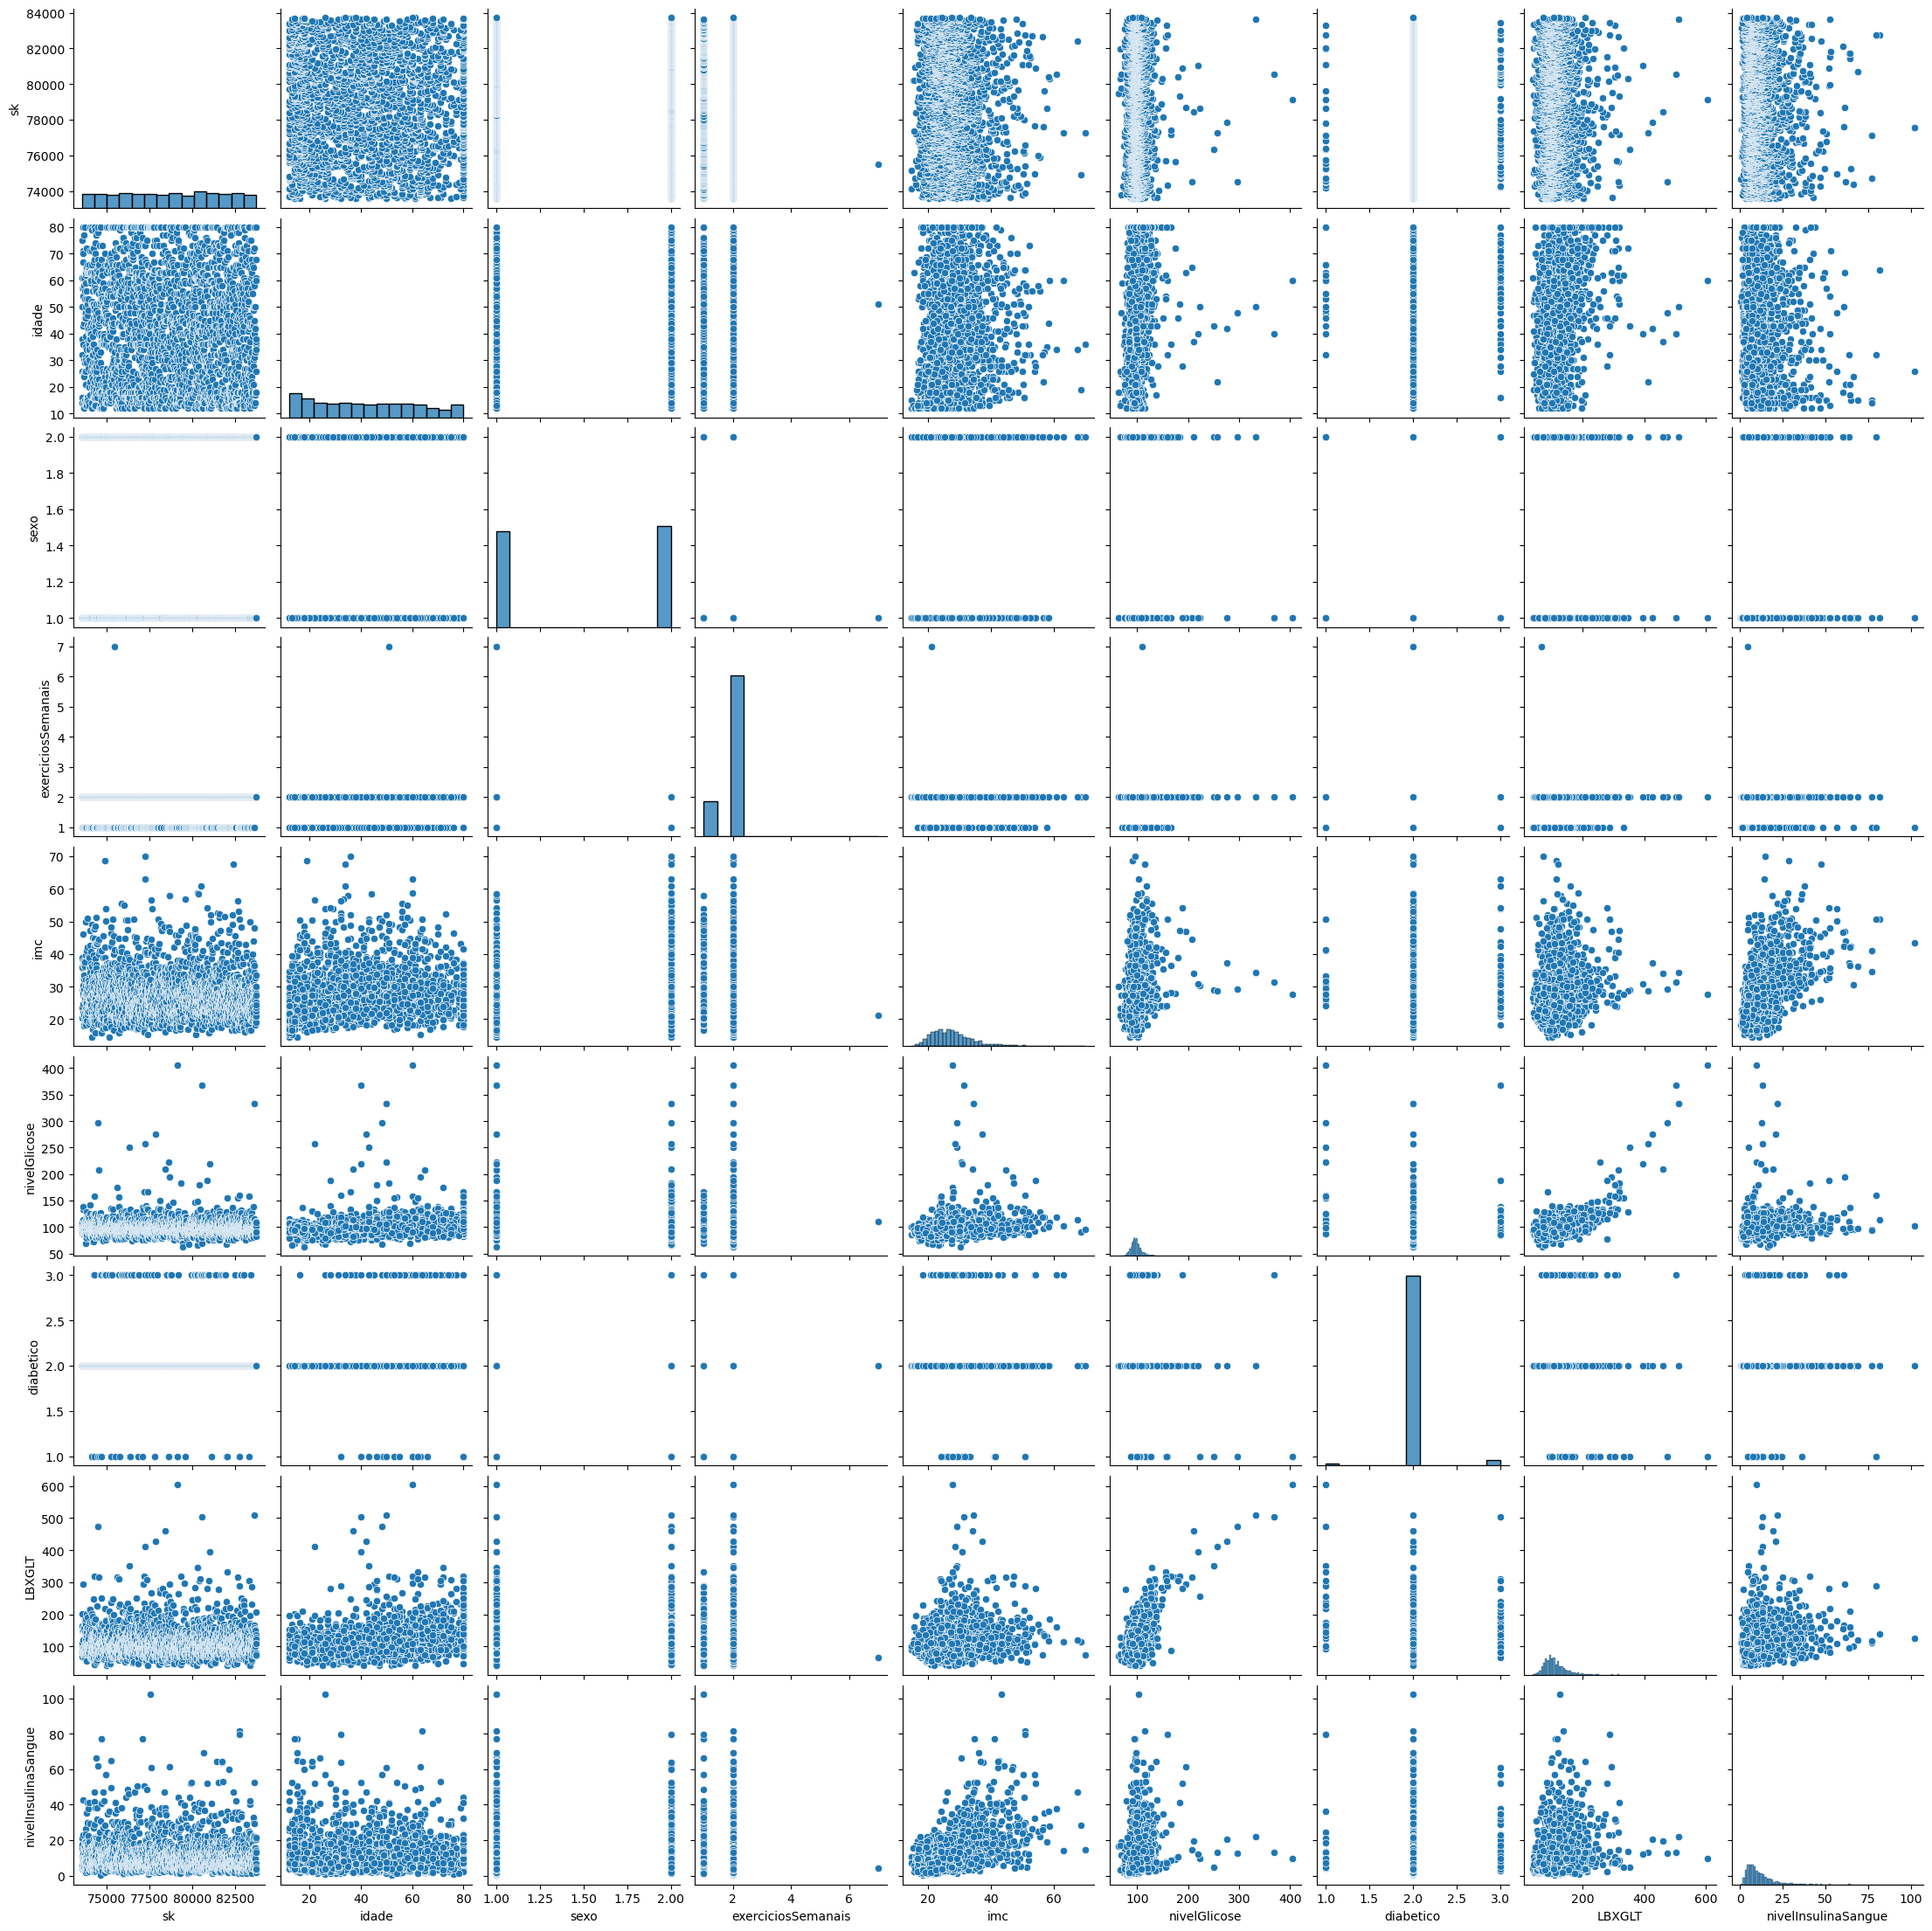

In [37]:
# Gráfico de dispersão - pares de variáveis
sns.pairplot(df_health)
plt.show()

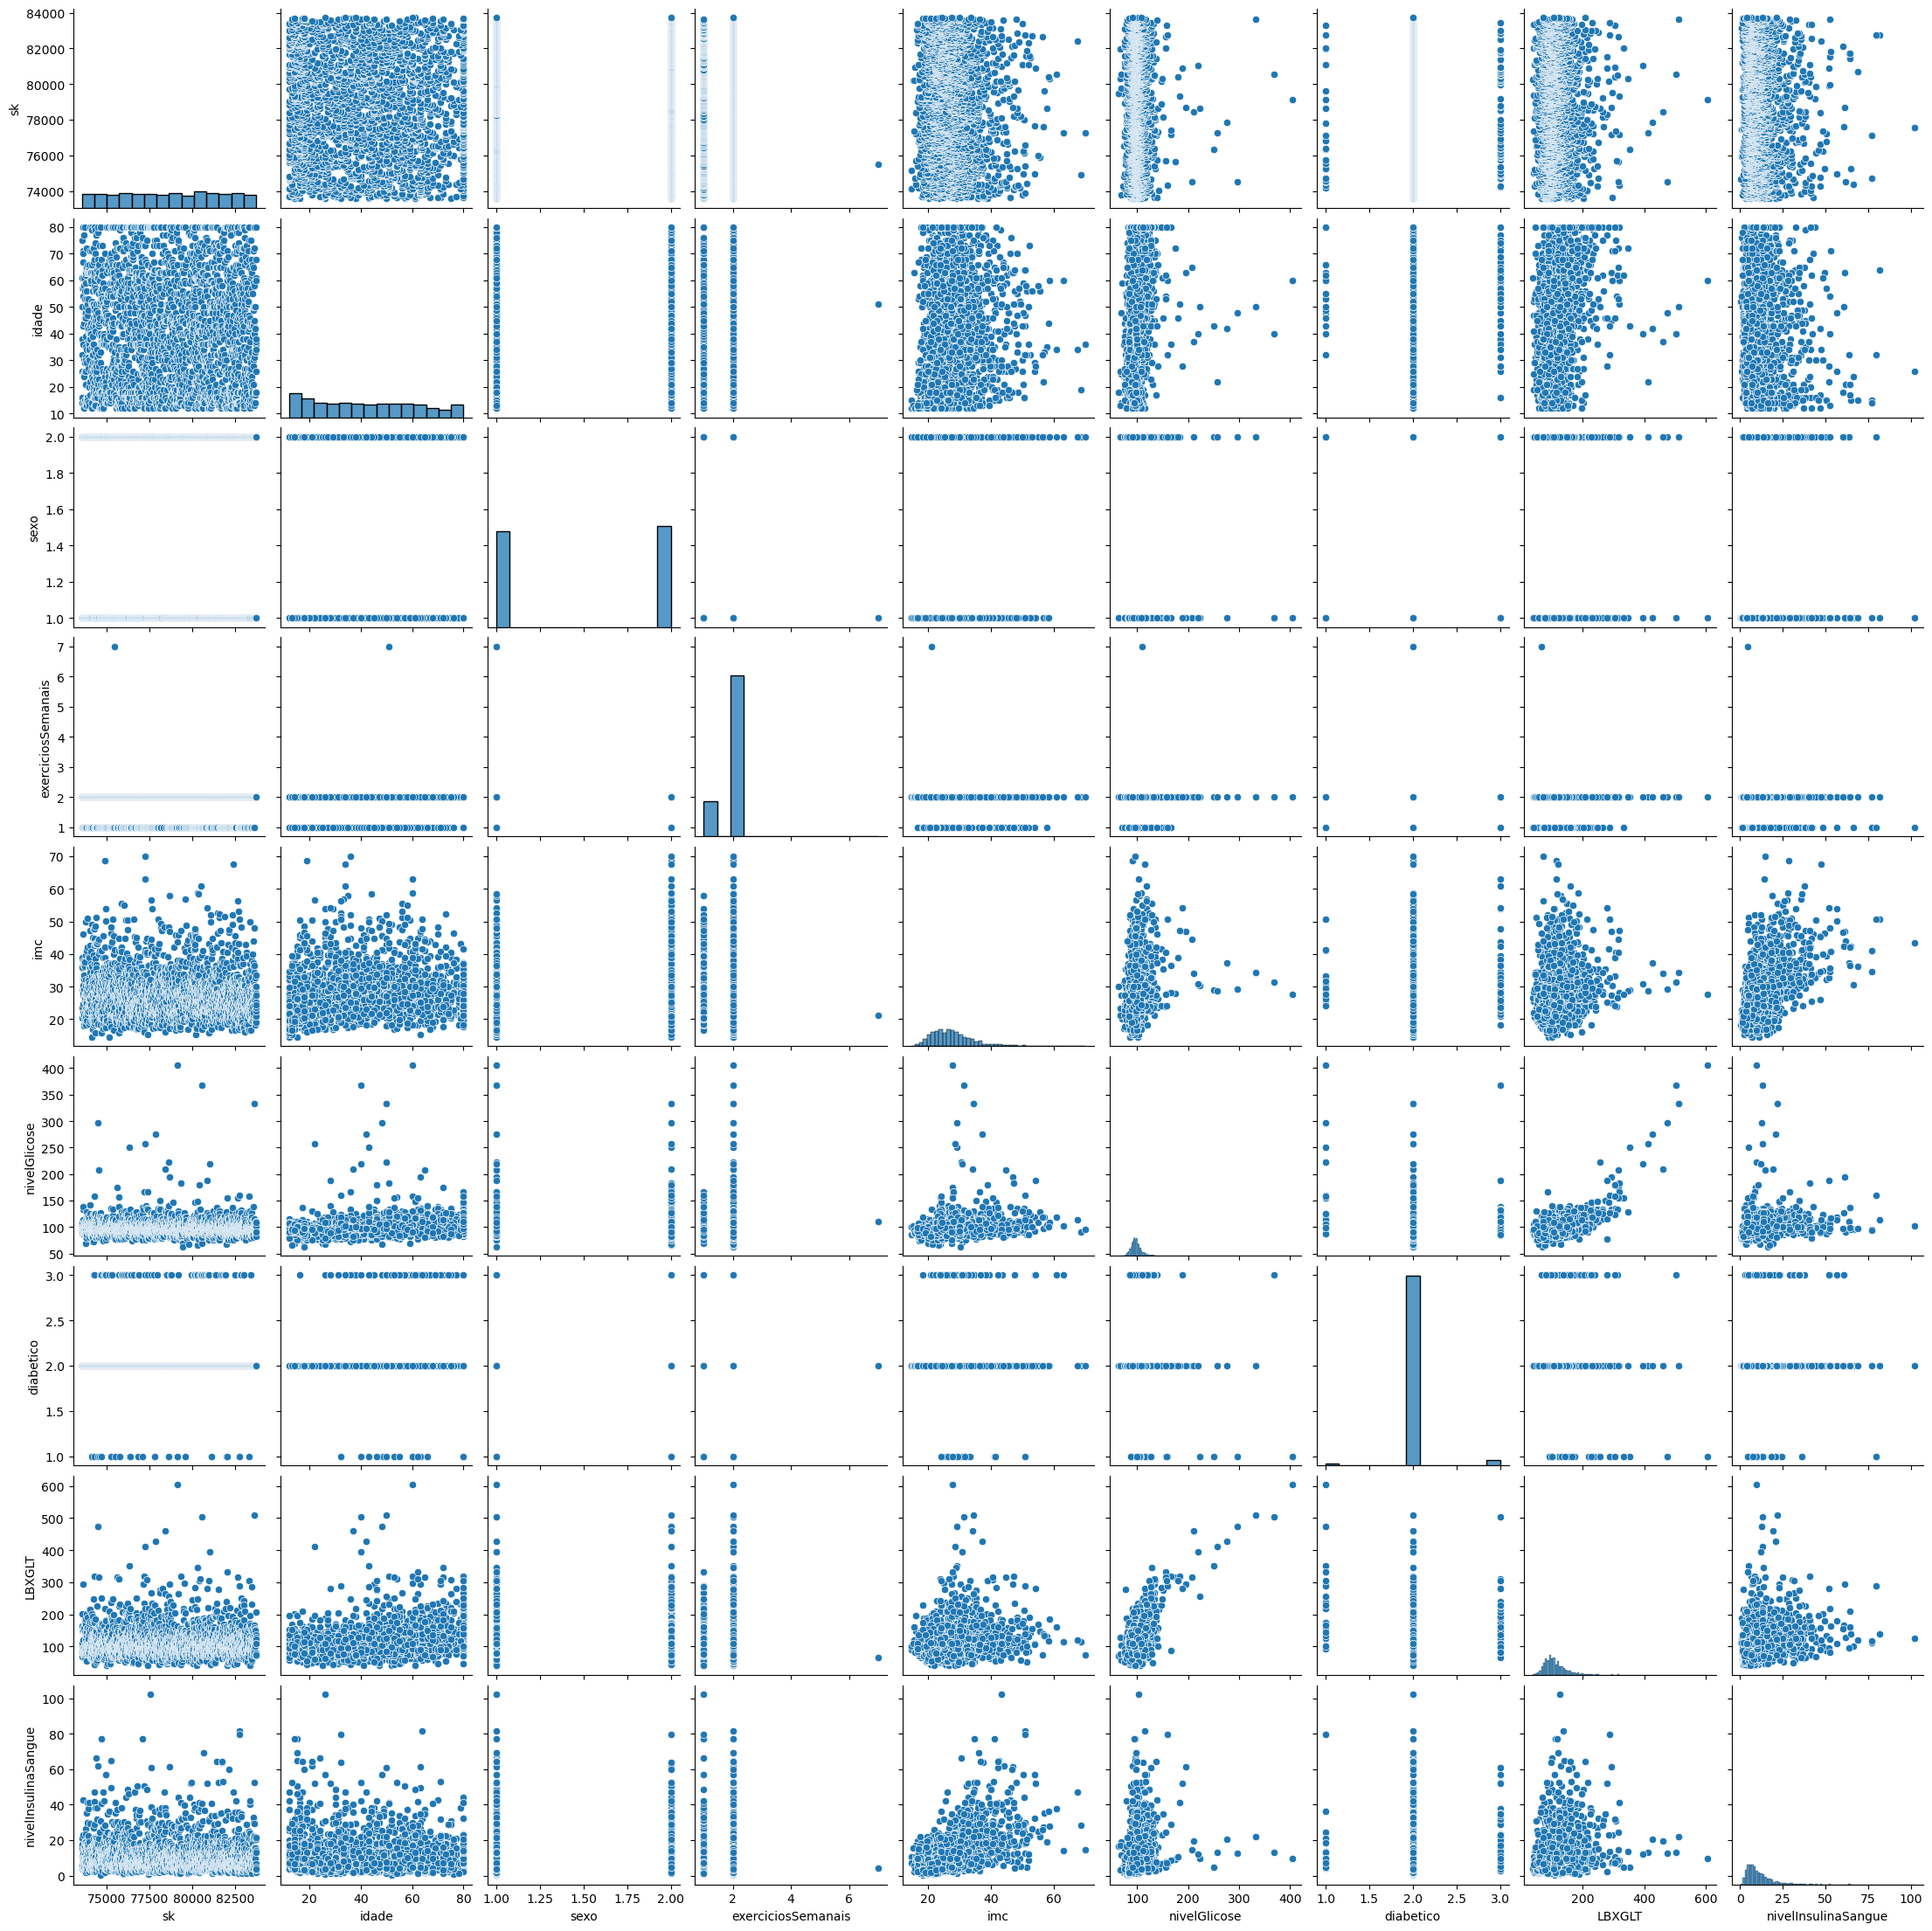

In [38]:
# Gráfico Pair Plot ou Scatterplot Matrix
sns.pairplot(df_health)
plt.show()

In [39]:
# Correlação
# Usar one-hot encoding para colunas categóricas
df_encoded = pd.get_dummies(df_health, drop_first=False)

In [40]:
# Calcular a matriz de correlação
correlation_matrix = df_encoded.corr()
#correlation_matrix = df_sample.corr()
print(correlation_matrix)

                           sk     idade      sexo  exerciciosSemanais  \
sk                   1.000000 -0.008806 -0.012962           -0.019701   
idade               -0.008806  1.000000  0.006398            0.025973   
sexo                -0.012962  0.006398  1.000000            0.151076   
exerciciosSemanais  -0.019701  0.025973  0.151076            1.000000   
imc                 -0.061343  0.147163  0.063873           -0.042935   
nivelGlicose        -0.004147  0.229624 -0.132342           -0.007849   
diabetico            0.014102  0.049970 -0.032769           -0.002599   
LBXGLT               0.006036  0.318044  0.017406            0.060413   
nivelInsulinaSangue -0.040028 -0.091879 -0.016660            0.010011   
faixaEtaria_Adult   -0.018257 -0.684490  0.002767           -0.094789   
faixaEtaria_Senior   0.018257  0.684490 -0.002767            0.094789   

                          imc  nivelGlicose  diabetico    LBXGLT  \
sk                  -0.061343     -0.004147   0.014102 

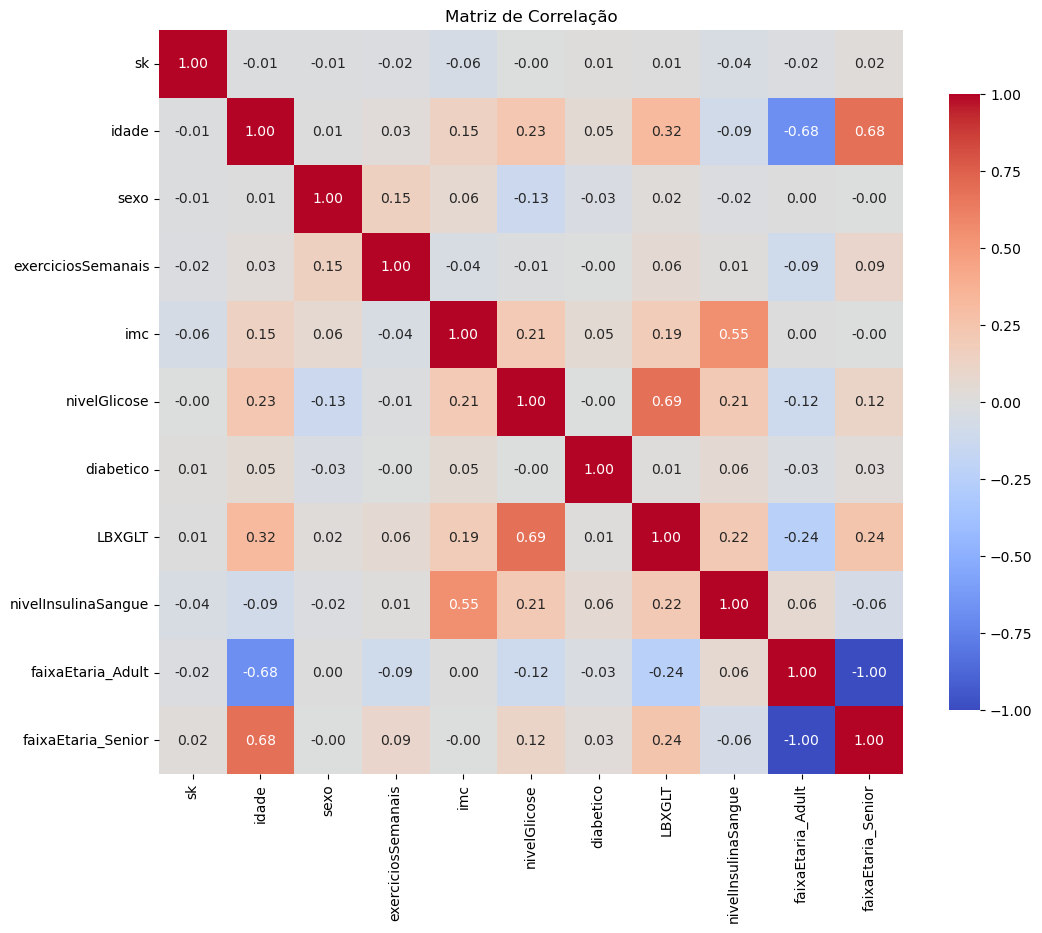

In [41]:
# Criar um mapa de calor da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Matriz de Correlação")
plt.show()

In [42]:
# Outliers
print(df_health.columns)
# Avaliacao de outiliers 
# Para calcular múltiplos quantis (ex: 0.25, 0.5, 0.75)
print('Coluna com mais correlação com Senior x Adult = LBXGLT:')
quantis_coluna=df_health['LBXGLT'].quantile([0.25, 0.5, 0.75])
print(quantis_coluna)
resumo_coluna=df_health['LBXGLT'].describe()
print(resumo_coluna)

Index(['sk', 'faixaEtaria', 'idade', 'sexo', 'exerciciosSemanais', 'imc',
       'nivelGlicose', 'diabetico', 'LBXGLT', 'nivelInsulinaSangue'],
      dtype='object')
Coluna com mais correlação com Senior x Adult = LBXGLT:
0.25     87.0
0.50    105.0
0.75    130.0
Name: LBXGLT, dtype: float64
count    2278.000000
mean      114.978929
std        47.061239
min        40.000000
25%        87.000000
50%       105.000000
75%       130.000000
max       604.000000
Name: LBXGLT, dtype: float64


In [43]:
# Treinamento etc...
# define os atributos dependentes e independente:
X=df_health.drop(columns=['faixaEtaria', 'idade'])
y=df_health['faixaEtaria']

In [45]:
# define o scaler, prepara (aprende) e executa normalização
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

In [46]:
# Logistic regression com grid search:
base_estimator = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularização
    'penalty': ['l1', 'l2']         # Tipos de penalidade
}

In [47]:
# Configurando o GridSearchCV
clf = GridSearchCV(base_estimator, param_grid, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [48]:
# Resultados
print("Melhores parâmetros:", clf.best_params_)
print("Acurácia no conjunto de teste:", clf.score(X_test, y_test))
print(clf.best_estimator_)
print('\nDetailed classification report:\n')
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

Melhores parâmetros: {'C': 0.01, 'penalty': 'l1'}
Acurácia no conjunto de teste: 0.8406432748538012
LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear')

Detailed classification report:

              precision    recall  f1-score   support

       Adult       0.84      1.00      0.91       575
      Senior       0.00      0.00      0.00       109

    accuracy                           0.84       684
   macro avg       0.42      0.50      0.46       684
weighted avg       0.71      0.84      0.77       684



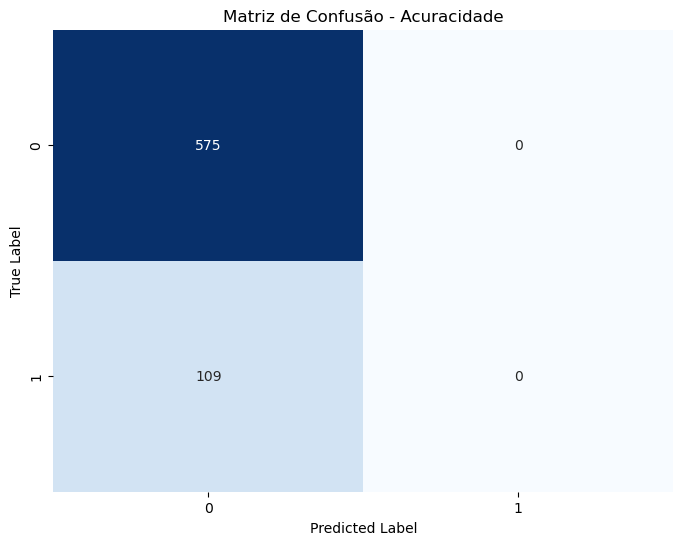

In [49]:
# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
# Exibindo a matriz de confusão com Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusão - Acuracidade")
plt.show()

Abaixo usando o F1score

In [50]:
# Logistic regression com grid search usando F1-score como métrica
clf_f1 = GridSearchCV(base_estimator, param_grid, cv=5, scoring='f1_weighted')  # Alterado para f1_weighted
clf_f1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='f1_weighted')

In [51]:
# Resultados
print("Melhores parâmetros com base no F1-score:", clf_f1.best_params_)
print("F1-score no conjunto de teste:", clf_f1.score(X_test, y_test))
print(clf_f1.best_estimator_)
print('\nDetailed classification report:\n')
y_pred_f1 = clf_f1.predict(X_test)
print(classification_report(y_test, y_pred_f1, zero_division=0))

Melhores parâmetros com base no F1-score: {'C': 0.01, 'penalty': 'l1'}
F1-score no conjunto de teste: 0.7678631978410415
LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear')

Detailed classification report:

              precision    recall  f1-score   support

       Adult       0.84      1.00      0.91       575
      Senior       0.00      0.00      0.00       109

    accuracy                           0.84       684
   macro avg       0.42      0.50      0.46       684
weighted avg       0.71      0.84      0.77       684



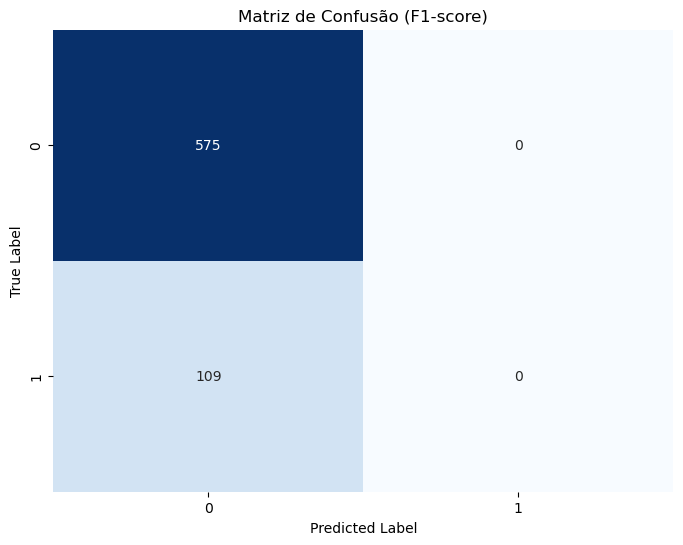

In [52]:
# Matriz de Confusão
conf_matrix_f1 = confusion_matrix(y_test, y_pred_f1)
# Exibindo a matriz de confusão com Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_f1, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusão (F1-score)")
plt.show()

In [53]:
# random forest:
    
rf = RandomForestClassifier(class_weight='balanced')  # Ajustar o peso das classes
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

clf_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1_weighted')
clf_rf.fit(X_train, y_train)

print("Melhores parâmetros com base no F1-score:", clf_rf.best_params_)
print("F1-score no conjunto de teste:", clf_rf.score(X_test, y_test))

y_pred_rf = clf_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf, zero_division=0))

Melhores parâmetros com base no F1-score: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
F1-score no conjunto de teste: 0.8203278006267138
              precision    recall  f1-score   support

       Adult       0.88      0.93      0.90       575
      Senior       0.47      0.32      0.38       109

    accuracy                           0.83       684
   macro avg       0.67      0.63      0.64       684
weighted avg       0.81      0.83      0.82       684



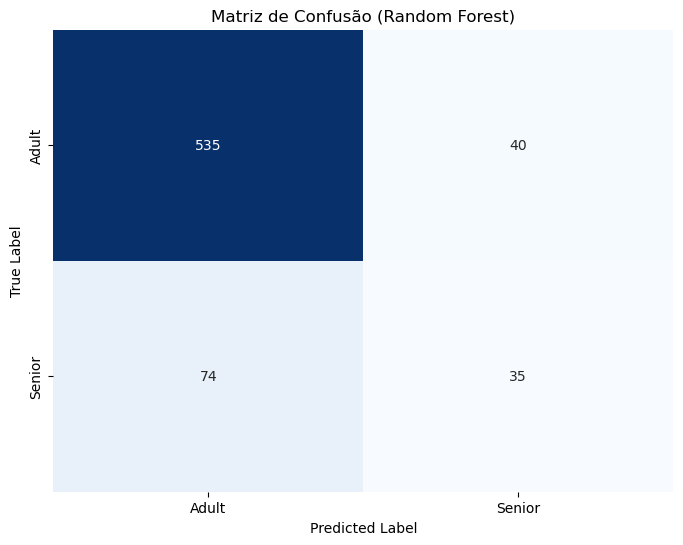

              precision    recall  f1-score   support

       Adult       0.88      0.93      0.90       575
      Senior       0.47      0.32      0.38       109

    accuracy                           0.83       684
   macro avg       0.67      0.63      0.64       684
weighted avg       0.81      0.83      0.82       684



In [54]:
# matriz de confusao no random forest
y_pred_rf = clf_rf.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Adult', 'Senior'], yticklabels=['Adult', 'Senior'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusão (Random Forest)")
plt.show()
# Relatório de classificação
print(classification_report(y_test, y_pred_rf, zero_division=0))